#Reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/cardio_train.csv', sep=";")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
age_array = data['age'].values
age_array = np.floor(age_array/365)
data['age'] = np.array(age_array, dtype=int)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.drop('id', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
data.value_counts('cardio')

cardio
0    35021
1    34979
Name: count, dtype: int64

In [9]:
data.value_counts('gender')

gender
1    45530
2    24470
Name: count, dtype: int64

#Data Visualizations

<Axes: >

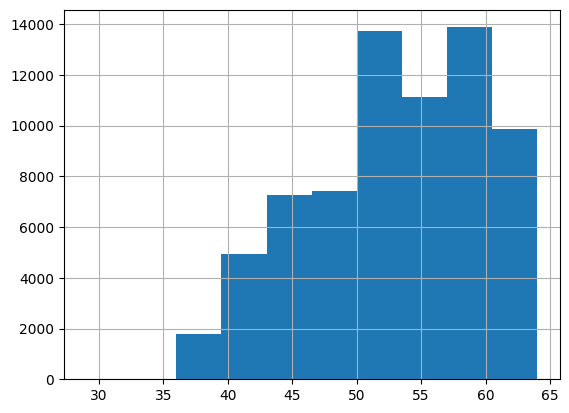

In [15]:
data['age'].hist()

<Axes: >

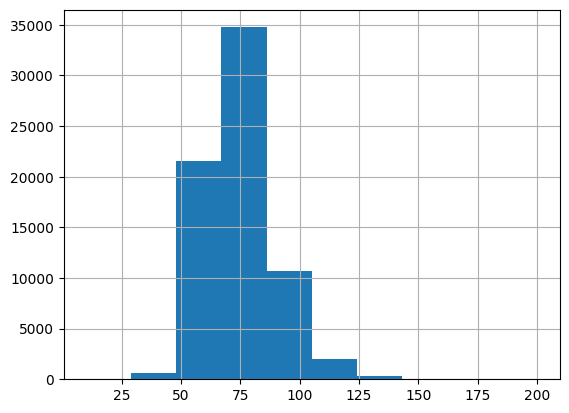

In [16]:
data['weight'].hist()

<Axes: >

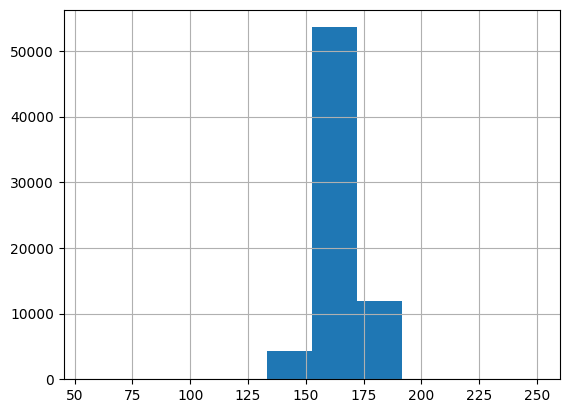

In [17]:
data['height'].hist()

In [67]:
X, y = data.drop(columns='cardio'), data['cardio']

In [12]:
columns_to_drop = ['smoke',
                 'alco',
                 'active',
                 ]
data_frame_for_viz = data.drop(columns=columns_to_drop, axis=1)

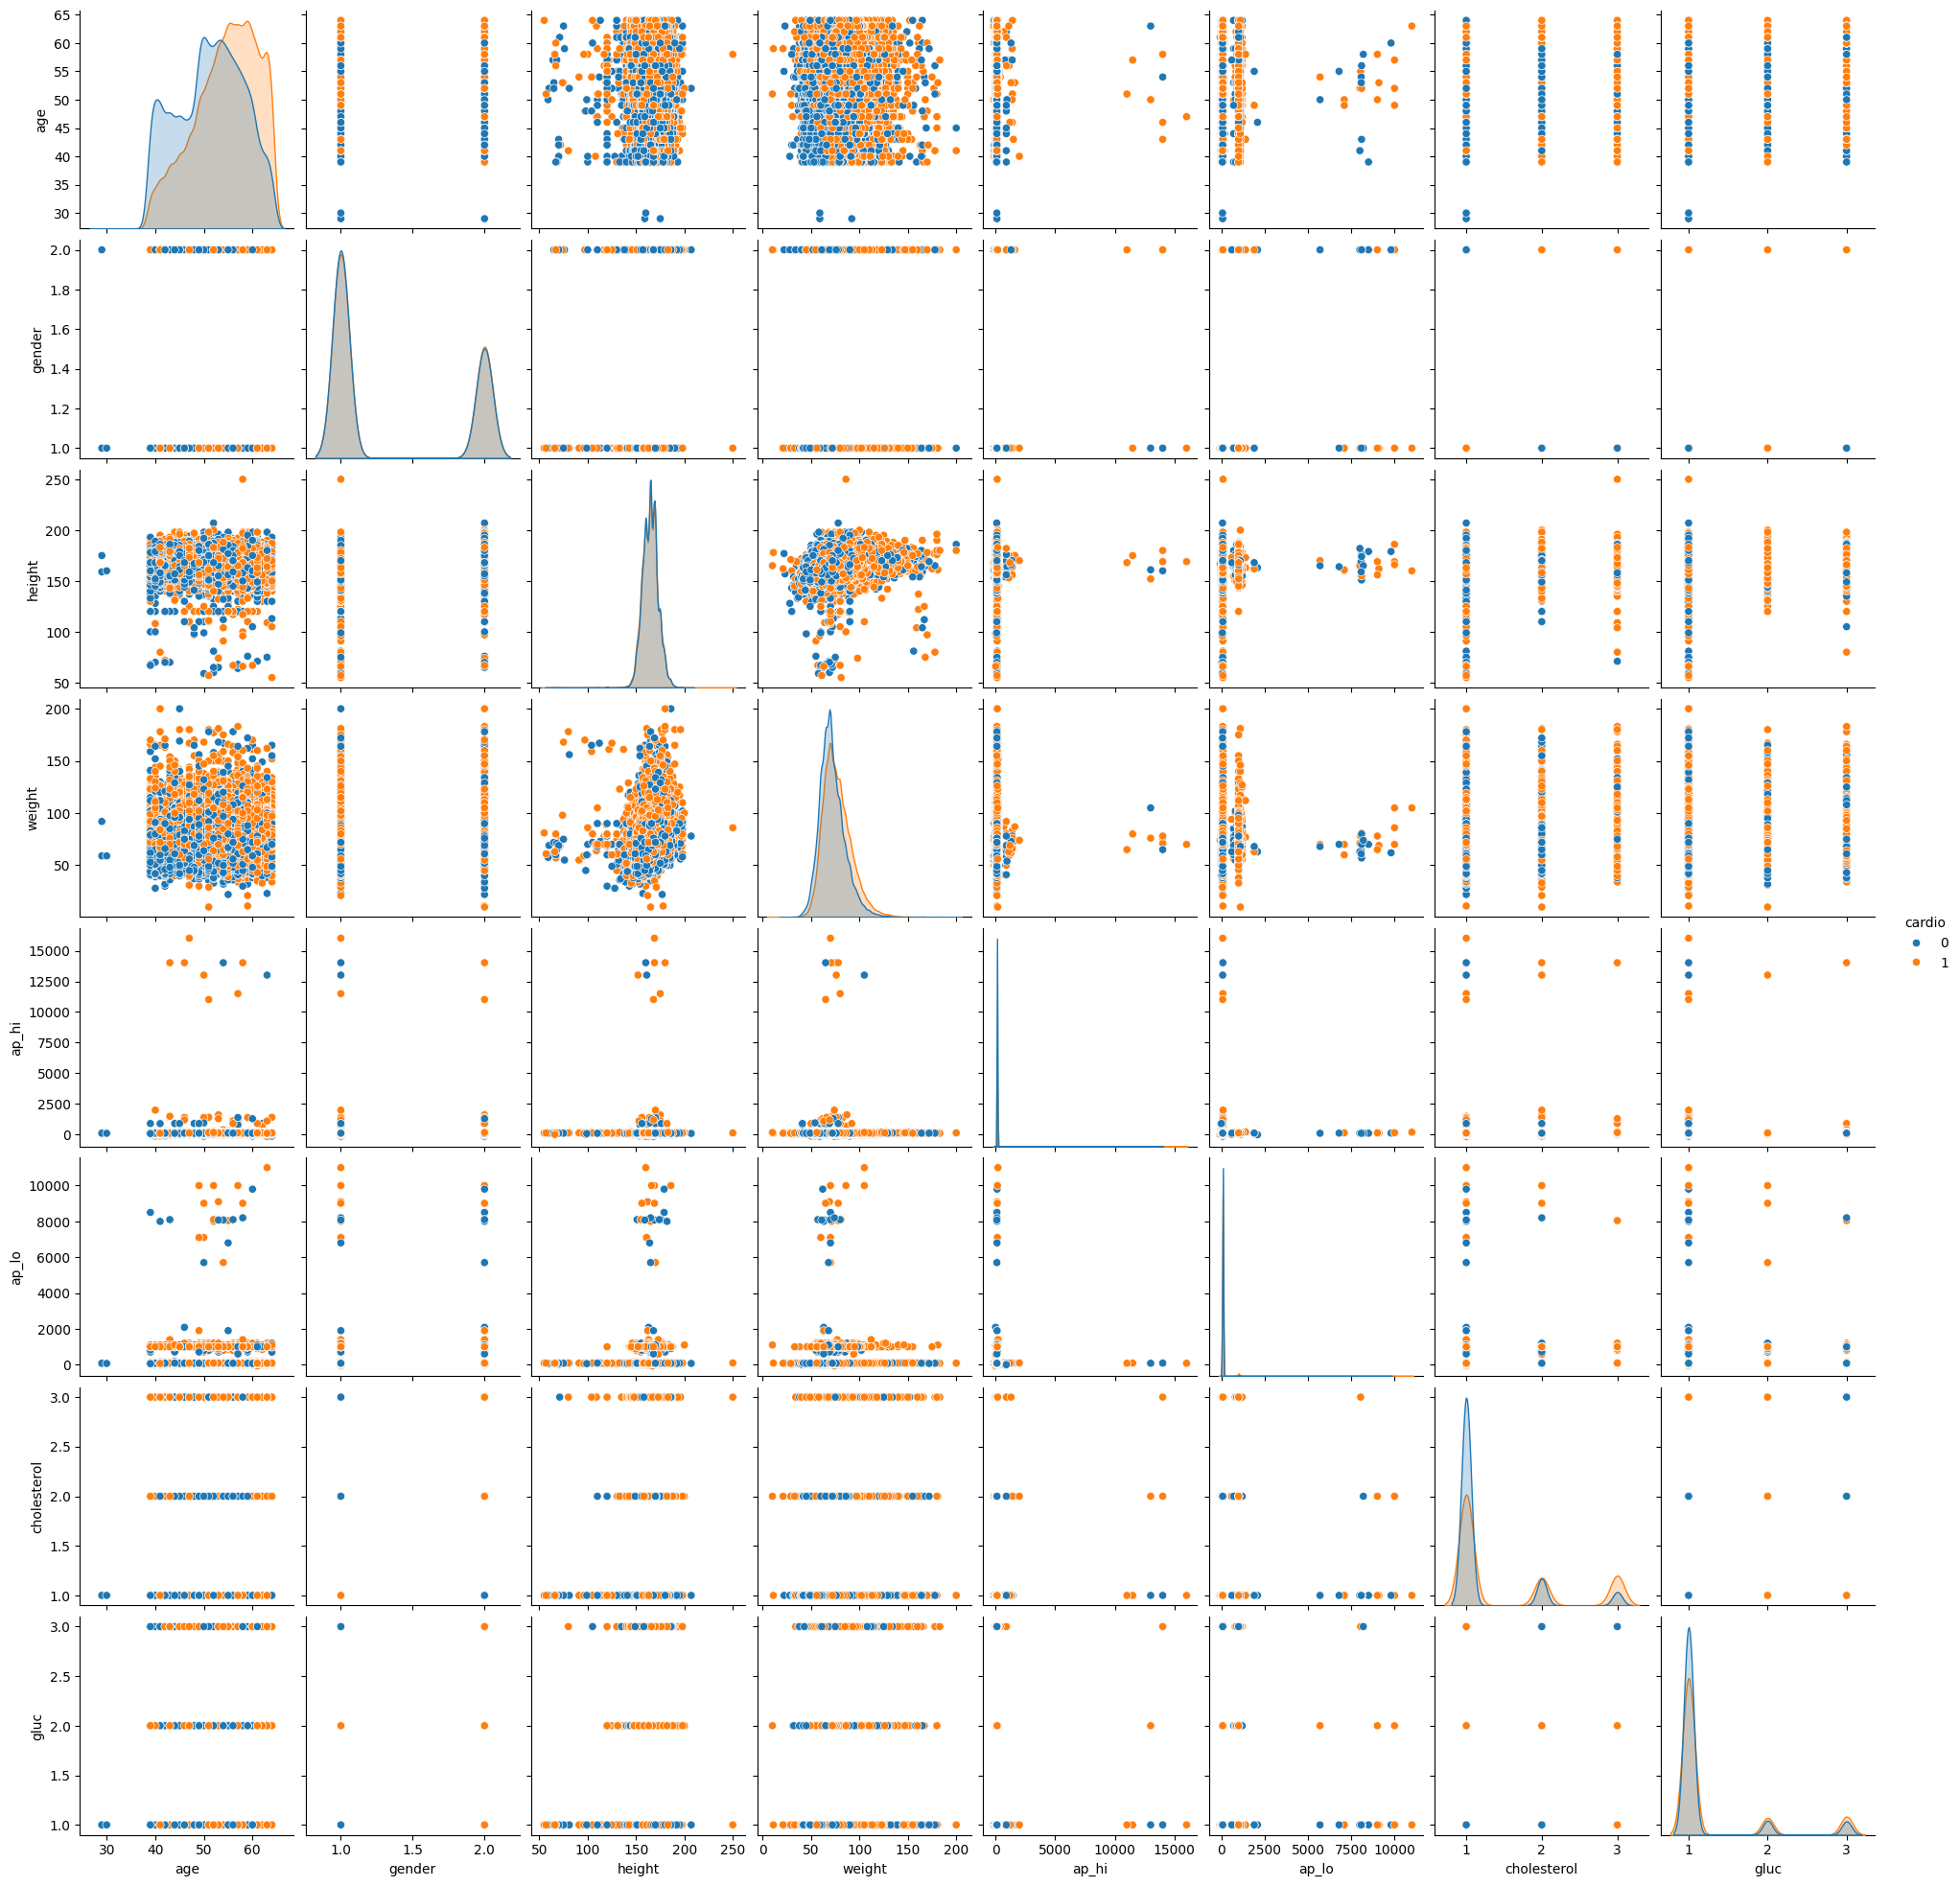

In [13]:
sns.pairplot(data=data_frame_for_viz, hue='cardio')
plt.show()

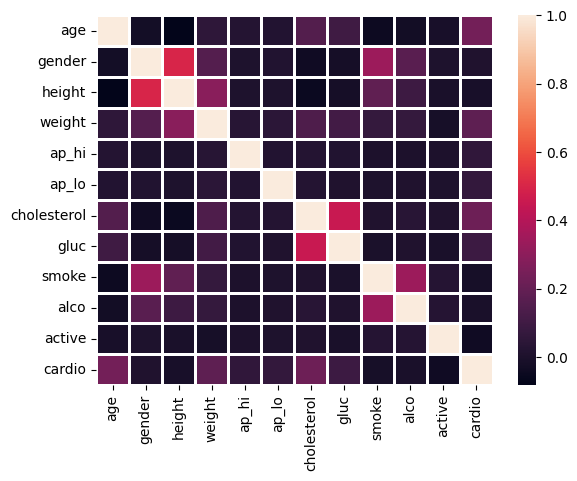

In [14]:
ax = sns.heatmap(data.corr(), annot=False, linewidth=1.0)
plt.show()

######Data Splitting and Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Classification models

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [94]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
}

###Training and testing the models

In [96]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.77      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6988
           1       0.71      0.71      0.71      7012

    accuracy                           0.71     1400

#Model Training and Testing with PCA

In [87]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [88]:
pca = PCA()

In [89]:
pipe = Pipeline([('pca', pca)])

In [90]:
n_components = np.arange(1, 12)
param_grid = {
    'pca__n_components': n_components
}

In [91]:
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X)
print("Best num of n_components:", grid_search.best_params_['pca__n_components'])

Best num of n_components: 10


In [92]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [97]:
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6988
           1       0.70      0.70      0.70      7012

    accuracy                           0.70     1400